# **__I. Analyse et exploration des données:__**

## **1. Importation des bibliothèques et du jeu de données**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession



In [2]:
# Initialisation de la session Spark // Port : 4040
# Une fois la seesion crée, on peut interagir avec les données stockées dans un environnement distribué.
spark = SparkSession.builder.appName('HeartDiseasesPredicion').config("spark.ui.port", "4041").getOrCreate()

In [3]:
# Importing data
path = 'cardiovascular_risk.csv'
# Chargement du jeu de données
data = spark.read.csv('dataset/train.csv', header=True, inferSchema=True)

df = pd.read_csv(path,index_col='id')


## **2. Compréhension des données**

In [4]:
# First 5 rows of the dataset 
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Dataset Rows & Columns 
df.shape

(3390, 16)

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


### **2.1. Description des variables :**

In [7]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Demographic:**
* Sex: Homme or femme ("M" or "F")
* Age: Age du patient (Continu - Bien que les âges enregistrés aient été tronqués à des nombres entiers, le concept d'âge est continu)
* Education: Le niveau d'éducation du patient (valeurs catégorielles - 1, 2, 3, 4)


**Behavioral:**
* is_smoking: Si le patient est un fumeur actuel ou non("YES" or "NO")
* Cigs Per Day: Le nombre de cigarettes fumées en moyenne par jour par la personne. (Peut être considéré comme continu car on peut avoir n'importe quel nombre de cigarettes, même une demi-cigarette.)

**Medical (history):**
* BP Meds: Si le patient prenait des médicaments contre l'hypertension artérielle (Nominal)
* Prevalent Stroke: Si le patient avait déjà eu un AVC(Nominal)
* Prevalent Hyp: Si le patient était hypertendu (Nominal)
* Diabetes: Si le patient était diabétique (Nominal)

**Medical (current):**
* Tot Chol: niveau de cholestérol total (Continu)
* Sys BP: pression artérielle systolique (Continu)
* Dia BP: pression artérielle diastolique (Continu)
* BMI: Indice de masse corporelle (Continu)
* Heart Rate: fréquence cardiaque (Continu - En recherche médicale, des variables telles que la fréquence cardiaque, bien qu'en réalité discrètes, sont considérées comme continues en raison du grand nombre de valeurs possibles.)
* Glucose: niveau de glucose (Continu)

**variable à predire (desired target):**
* 10 ans de risque de maladie coronarienne CHD (binaire: «1», signifie «Yes», «0» signifie «No»). 

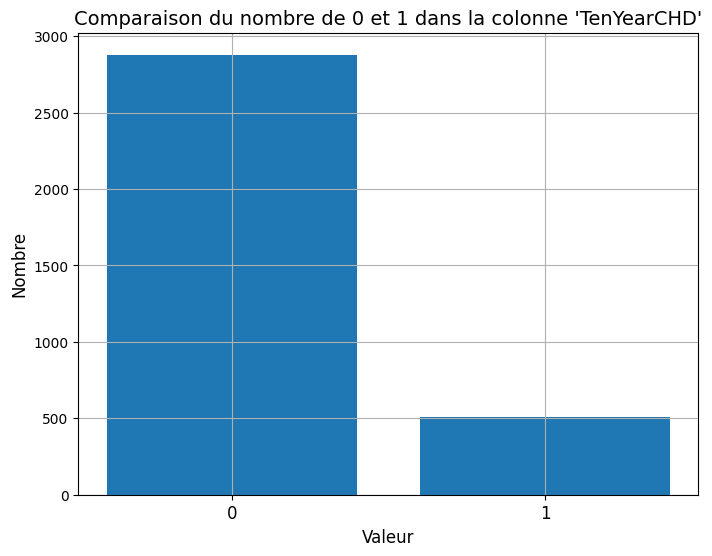

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_comparaison_0_1(dataframe, nom_colonne_cible):
  """
  Crée un graphique à barres comparant le nombre de 0 et de 1 dans une colonne cible d'un dataframe.

  Args:
      dataframe (pd.DataFrame): Le DataFrame contenant la colonne cible.
      nom_colonne_cible (str): Le nom de la colonne cible contenant les valeurs 0 et 1.
  """
  try:
    # Compter les occurrences de 0 et 1
    compte_0 = (dataframe[nom_colonne_cible] == 0).sum()
    compte_1 = (dataframe[nom_colonne_cible] == 1).sum()

    # Créer les données pour le graphique
    donnees = pd.DataFrame({'Valeur': [0, 1], 'Nombre': [compte_0, compte_1]})

    # Créer le graphique à barres
    plt.figure(figsize=(8, 6))  # Ajuster la taille du graphique si nécessaire
    plt.bar(donnees['Valeur'], donnees['Nombre'])
    plt.xlabel("Valeur", fontsize=12)
    plt.ylabel("Nombre", fontsize=12)
    plt.title("Comparaison du nombre de 0 et 1 dans la colonne '{}'".format(nom_colonne_cible), fontsize=14)
    plt.xticks([0, 1], ['0', '1'], fontsize=12)  # Afficher les étiquettes 0 et 1 sur l'axe des x
    plt.grid(True)
    plt.show()

  except KeyError:
    print("Erreur : La colonne '{}' n'existe pas dans le DataFrame.".format(nom_colonne_cible))
  except Exception as e:
    print("Erreur inattendue :", e)

# Exemple d'utilisation (remplacer par votre DataFrame et le nom de la colonne)
# dataframe = pd.DataFrame({'target': [0, 1, 1, 0, 1, 0, 0, 1]})
afficher_comparaison_0_1(df, 'TenYearCHD')

In [9]:
# checking duplicates
len(df[df.duplicated()])

0

In [11]:
# checking null values
df.isna().sum().sum()

510

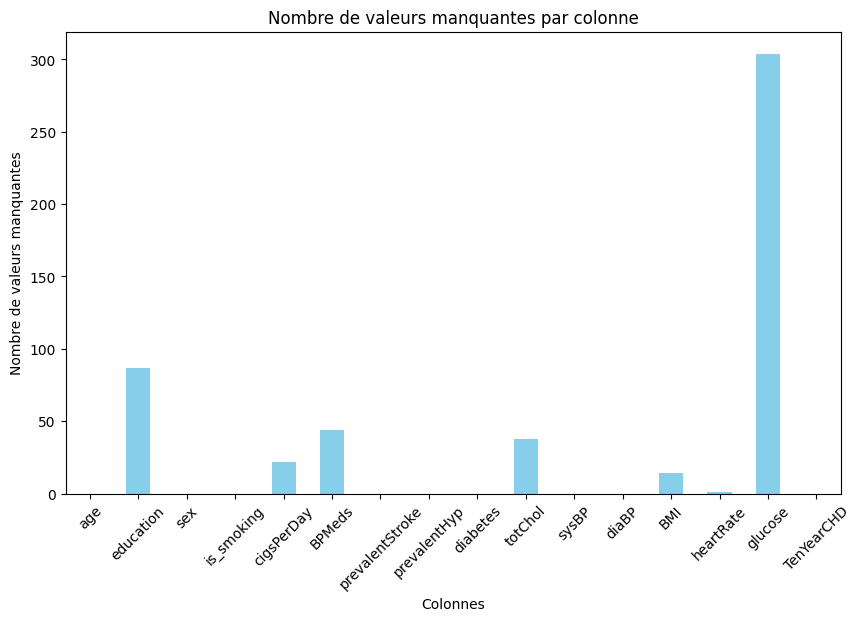

In [12]:
# Compter le nombre de valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()

* Le jeu de données provient d'une étude cardiovasculaire en cours sur les résidents de la ville de Framingham, Massachusetts. L'objectif de classification est de prédire si le patient présente un risque de maladie coronarienne (CHD) dans les 10 prochaines années.
* **Le jeu de données contient 3390 lignes et 16 colonnes. Il n'y a pas d'enregistrements en double et contient 510 valeurs manquantes.**

In [13]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
totChol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


In [14]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

### **2.2. Analyse de distribution des données**

In [15]:
dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

<Figure size 1000x500 with 0 Axes>

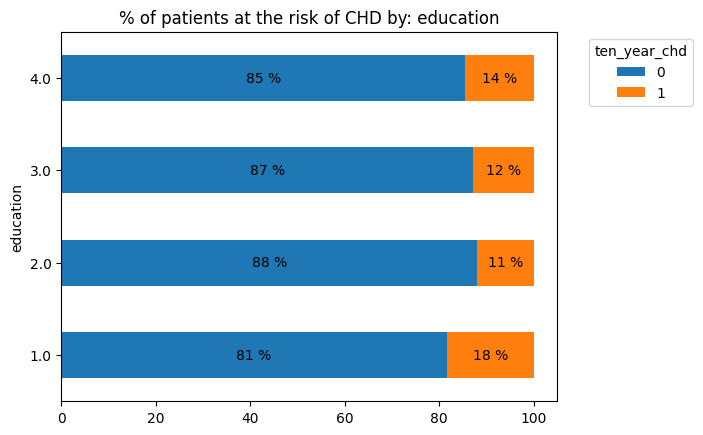

<Figure size 1000x500 with 0 Axes>

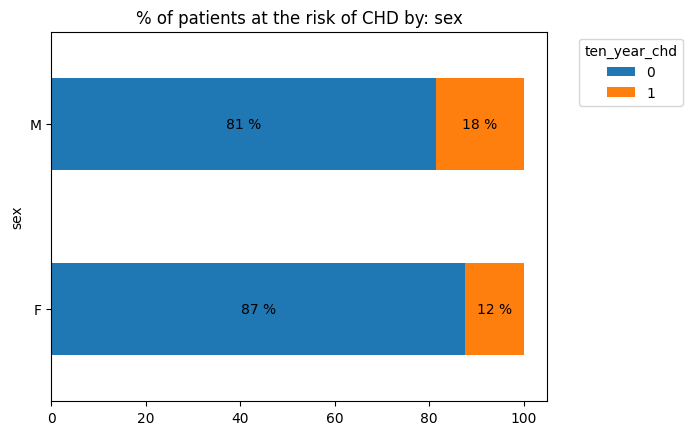

<Figure size 1000x500 with 0 Axes>

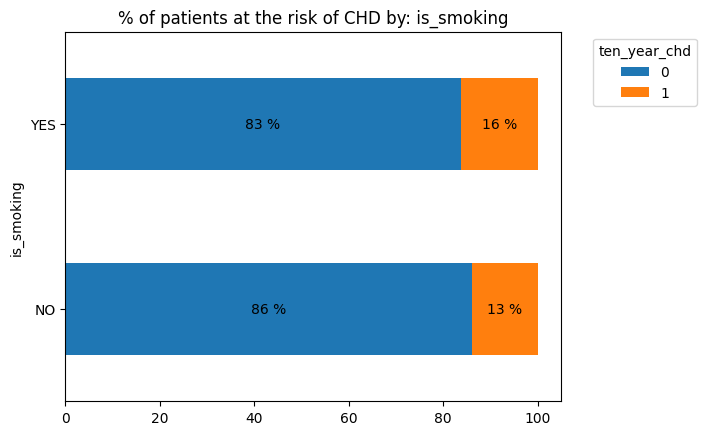

<Figure size 1000x500 with 0 Axes>

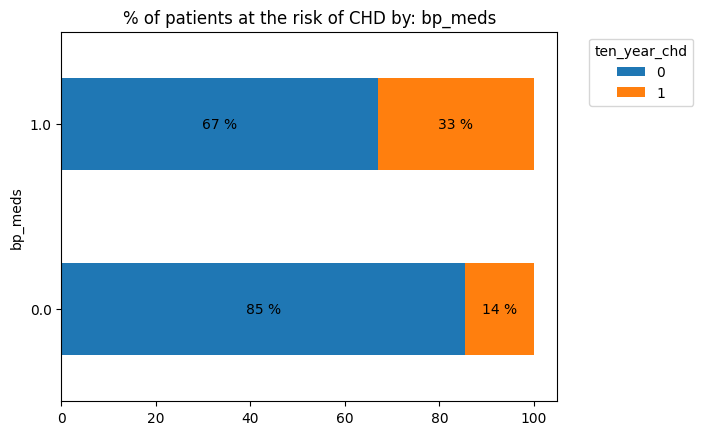

<Figure size 1000x500 with 0 Axes>

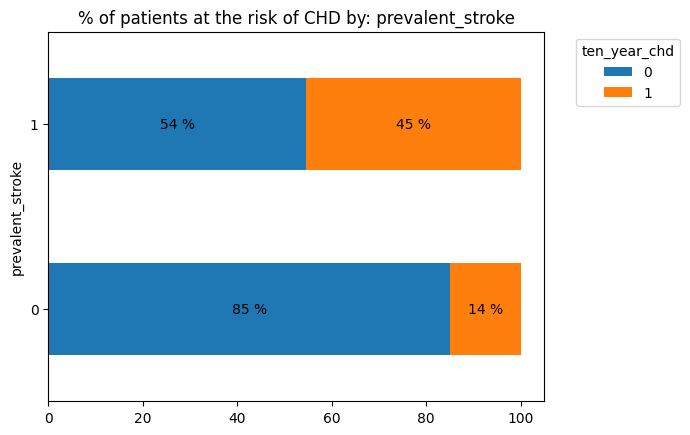

<Figure size 1000x500 with 0 Axes>

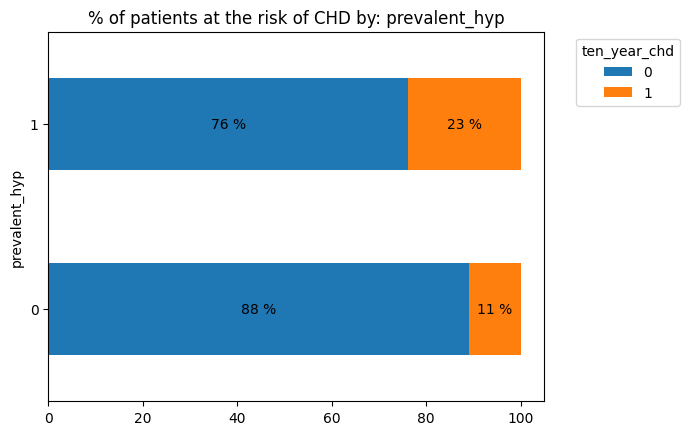

<Figure size 1000x500 with 0 Axes>

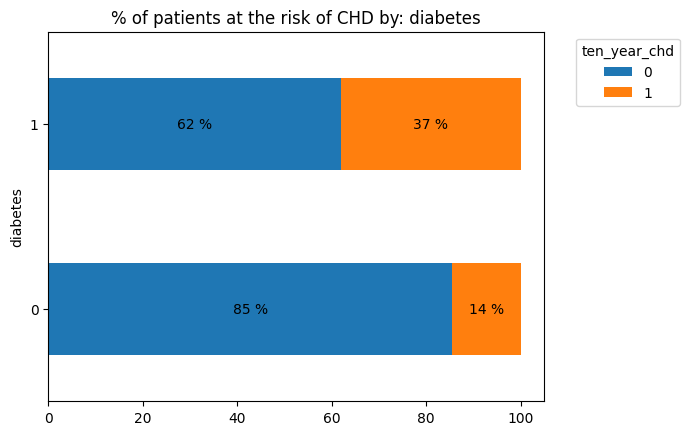

In [16]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

Résumé:
* 18%, 11%, 12%, 14% des patients appartenant respectivement aux niveaux 
d'éducation 1, 2, 3, 4 ont finalement été diagnostiqués avec une MCV (maladie 
cardiovasculaire). 
* Les patients masculins présentent un risque significativement plus élevé de MCV 
(18%) que les patients féminins (12%).**
* Les patients qui fument ont un risque significativement plus élevé de MCV (16%) que 
les patients non fumant (13%).
* Les patients prenant des médicaments pour la tension artérielle ont un risque 
significativement plus élevé de MCV (33%) que les autres patients (14%).
* Les patients ayant déjà eu un AVC ont un risque significativement plus élevé de MCV 
(45%) que les autres patients (14%). 
* Les patients hypertendus ont un risque significativement plus élevé de MCV (23%) 
que les autres patients (11%).
* Les patients diabétiques ont un risque significativement plus élevé de MCV (37%) 
que les autres patients (14%). 

In [17]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

### **2.3. Analyse de corrélation:**

<Axes: title={'center': 'Correlation Analysis'}>

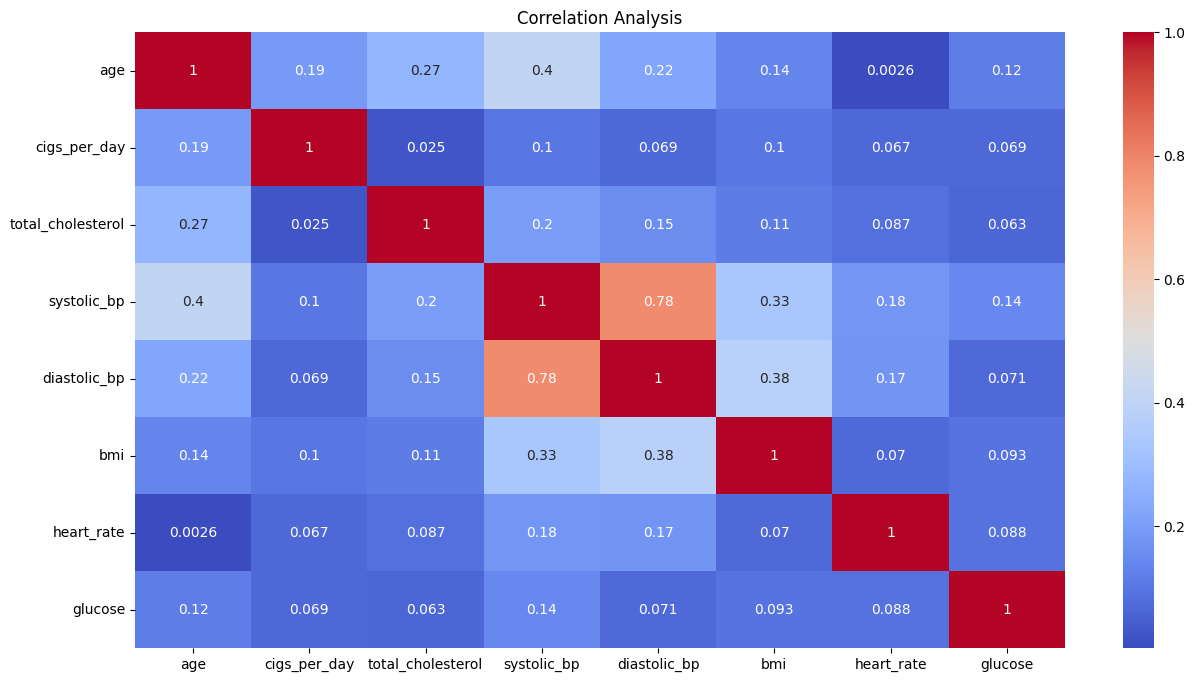

In [18]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')           

* **Les variables tension artérielle systolique(systolic_bp) et diastolique(diastolic_bp) sont fortement corrélées.**

### **2.4. Handling Multicollinearity:**

In [19]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


Pour gérer la multicollinéarité entre ces deux variables continues indépendantes, nous pouvons remplacer ces deux colonnes par une nouvelle variable 'pression pulsée', définie comme suit :

Pression Pulsée = Pression Artérielle Systolique - Pression Artérielle Diastolique

In [20]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [21]:
# columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

In [22]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\3383542107.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pulse_pressure'])


Text(0.5, 1.0, 'Pulse Pressure Distribution')

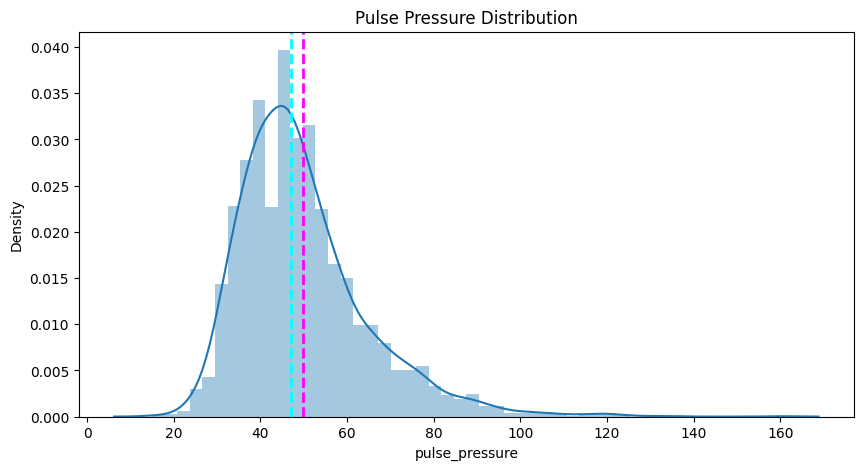

In [23]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

Les pressions pulsées présentent une asymétrie positive.

<Figure size 1000x500 with 0 Axes>

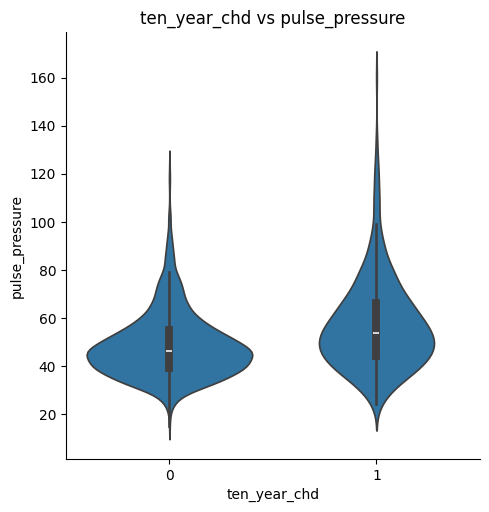

In [24]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

En moyenne, les patients ayant une pression pulsée plus élevée sont exposés à la maladie coronarienne sur une période de 10 ans.

<Axes: title={'center': 'Correlation Analysis'}>

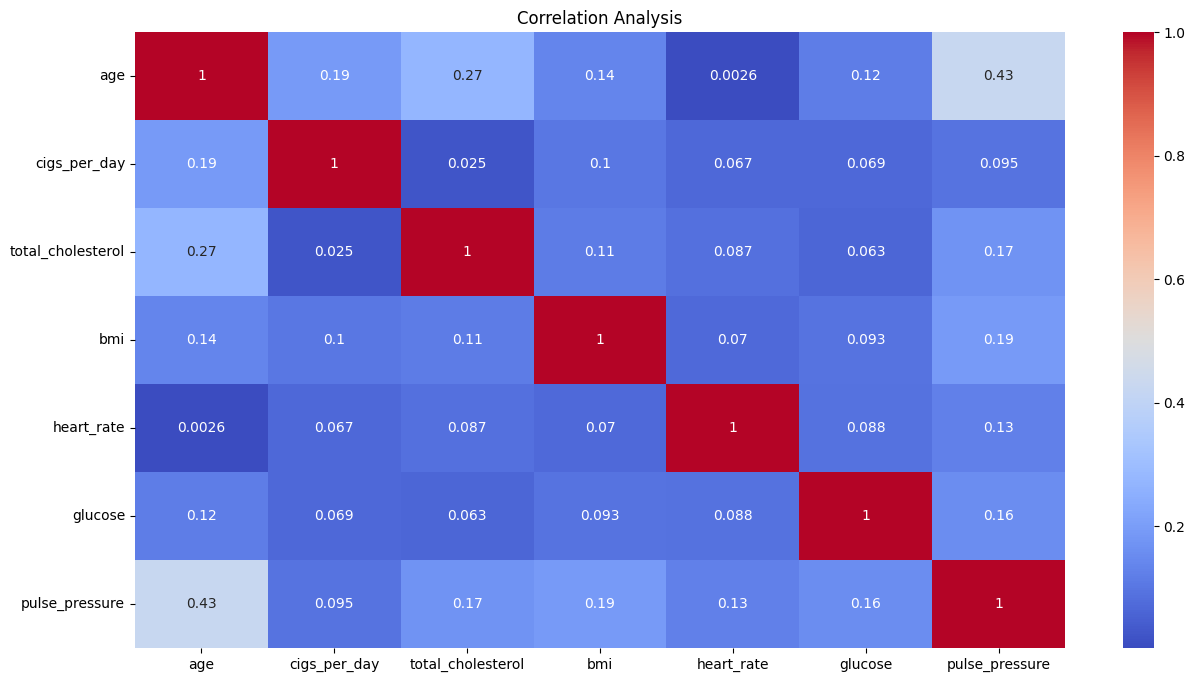

In [25]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Nous avons réussi à gérer la multicollinéarité parmi les variables continues dans l'ensemble de données.

# **__II. Préparation des données:__**

In [26]:
# checking for null values
df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
pulse_pressure         0
dtype: int64

In [27]:
# total null values
df.isna().sum().sum()

510

**Il y a un total de 510 valeurs manquantes dans le jeu de données.**

## **1. Remplacement des valeurs manquantes dans les colonnes catégorielles par l'entrée la plus fréquente "Le mode" :**

In [28]:
# education distribution before mode imputation
df.education.value_counts()

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64

In [29]:
# bp_meds distribution before mode imputation
df.bp_meds.value_counts()

bp_meds
0.0    3246
1.0     100
Name: count, dtype: int64

In [30]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [31]:
# education distribution after mode imputation
df.education.value_counts()

education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64

In [32]:
# bp_meds distribution after mode imputation
df.bp_meds.value_counts()

bp_meds
0.0    3290
1.0     100
Name: count, dtype: int64

## **2. cigs_per_day:**

In [33]:
# Mean and median number of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [34]:
# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,28.66,69.0,66.0,0,72.0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,26.74,83.0,85.0,0,46.5
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,22.06,66.0,NaN,0,50.0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,27.30,103.0,106.0,0,70.0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,24.35,79.0,82.0,0,52.5
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,26.05,95.0,86.0,0,38.0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,24.44,72.0,80.0,0,51.0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,21.45,72.0,89.0,0,54.0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,24.43,80.0,93.0,0,46.0


**D'après le tableau ci-dessus, nous constatons que pour chaque cas de valeurs manquantes dans le nombre de cigarettes par jour, les patients ont déclaré qu'ils fument.**

Vérifions la moyenne et la médiane du nombre de cigarettes fumées par les patients qui ont déclaré fumer.

In [35]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigs_per_day'].mean(),df[df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

* La moyenne du nombre de cigarettes pour un fumeur est de 18,34
* la médiane du nombre de cigarettes pour un fumeur est de 20.

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\2033564051.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])


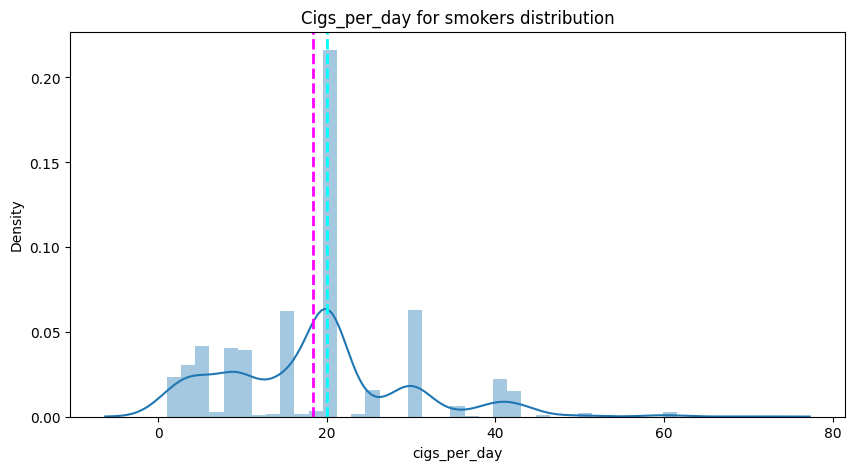

In [36]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)         
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)           
plt.title('Cigs_per_day for smokers distribution')
plt.show()

On constate que la densité est maximal pour les gens fumant 20 cigarette par jours


<Axes: ylabel='cigs_per_day'>

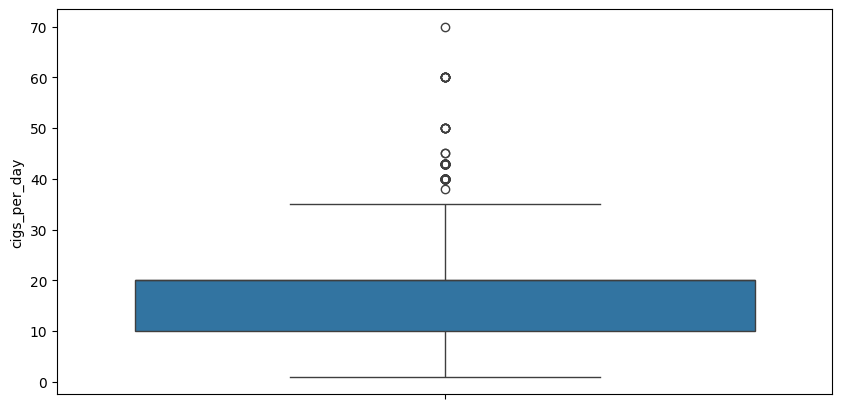

In [37]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])

**Puisque le nombre de cigarettes fumées par les patients fumeurs contient des valeurs aberrantes, les valeurs manquantes dans la colonne "cigs_per_day" peuvent être imputées avec sa valeur médiane.**

In [38]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())         

In [39]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,,,


In [40]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,,,


**Il n'y a aucune erreur dans cette ligne.**

## **3. total_cholestrol, bmi, heart_rate:**

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\1580107993.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


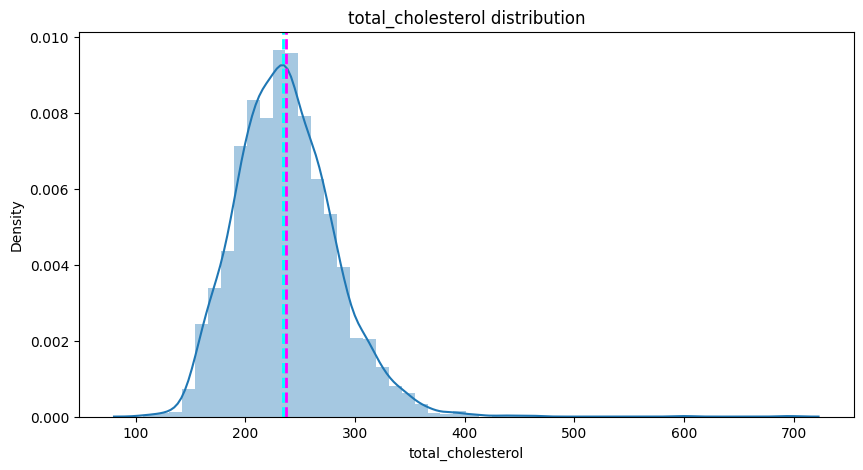

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\1580107993.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


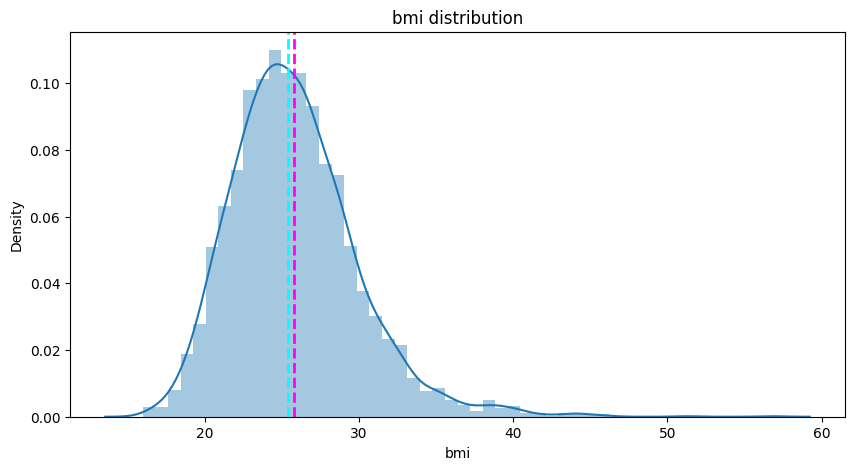

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\1580107993.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


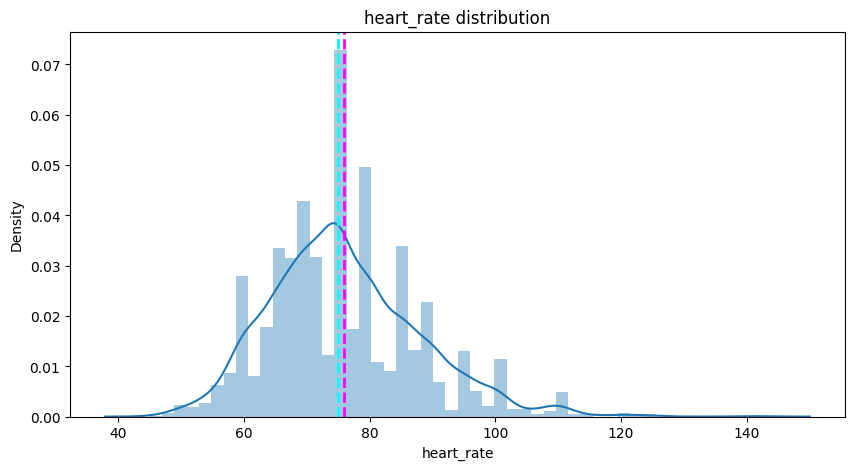

In [41]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

**Les colonnes total_cholesterol, bmi et heart_rate présentent une asymétrie positive.**

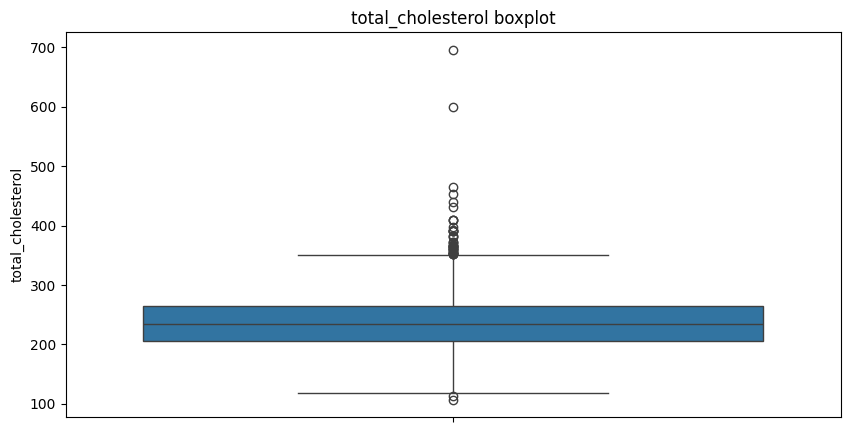

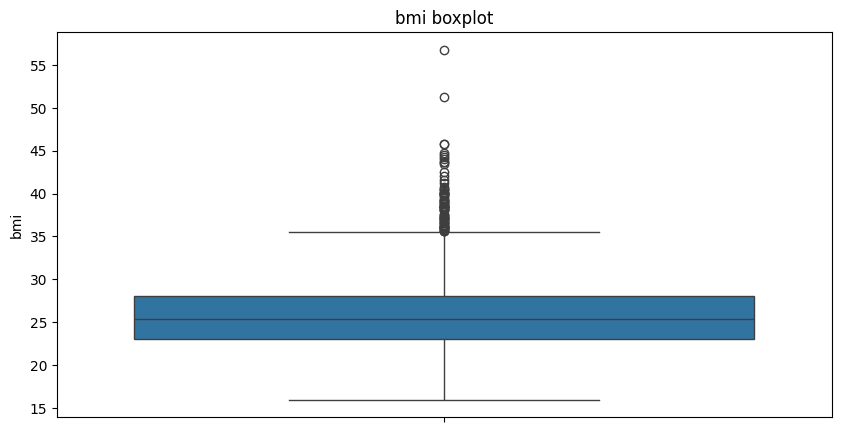

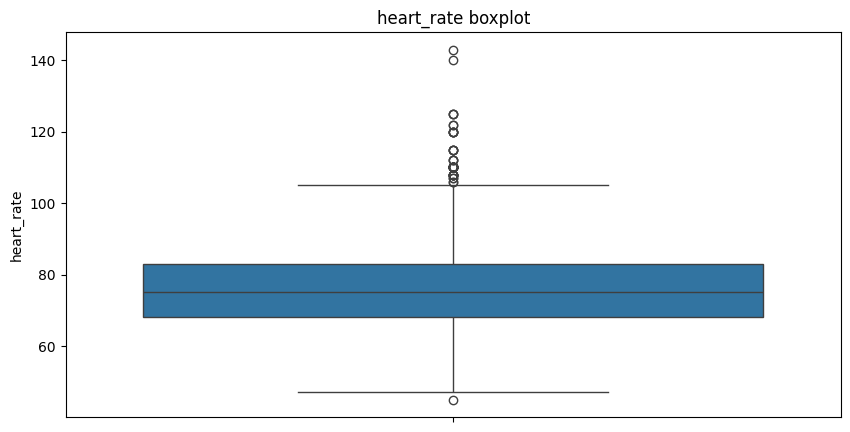

In [42]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

**les colonnes: total_cholestrol, bmi, and heart_rate contiennent des valeurs aberrantes.**

In [43]:
# Mean and median for total_cholesterol
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [44]:
# Mean and median for bmi
df.bmi.mean(),df.bmi.median()

(25.7949644549763, 25.38)

In [45]:
# Mean and median for heart_rate
df.heart_rate.mean(),df.heart_rate.median()

(75.97727943346119, 75.0)

**Puisque les colonnes total_cholesterol, bmi et heart_rate présentent une asymétrie positive et contiennent également des valeurs aberrantes, nous pouvons imputer les valeurs manquantes avec leur médiane.**

In [46]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values      
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())                
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())           

In [47]:
# mean and median of total_cholesterol after median imputation
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.03982300884957, 234.0)

In [48]:
# mean and median of bmi after median imputation
df.bmi.mean(),df.bmi.median()

(25.793250737463126, 25.38)

In [49]:
# mean and median of heart_rate after median imputation
df.heart_rate.mean(),df.heart_rate.median()

(75.97699115044247, 75.0)

## **4. glucose:**

In [50]:
# total missing values in glucose
df.glucose.isna().sum()

304

**La colonne "glucose" contient 304 valeurs manquantes.**

C:\Users\hamza\AppData\Local\Temp\ipykernel_30460\711793079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'])


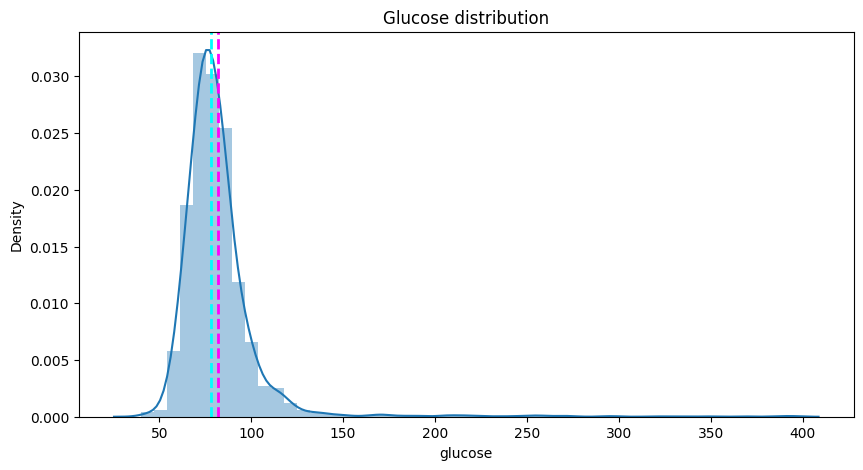

In [51]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)                
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)              
plt.title('Glucose distribution')
plt.show()

**glucose présentent une asymétrie positive.**

Text(0.5, 1.0, 'Glucose boxplot')

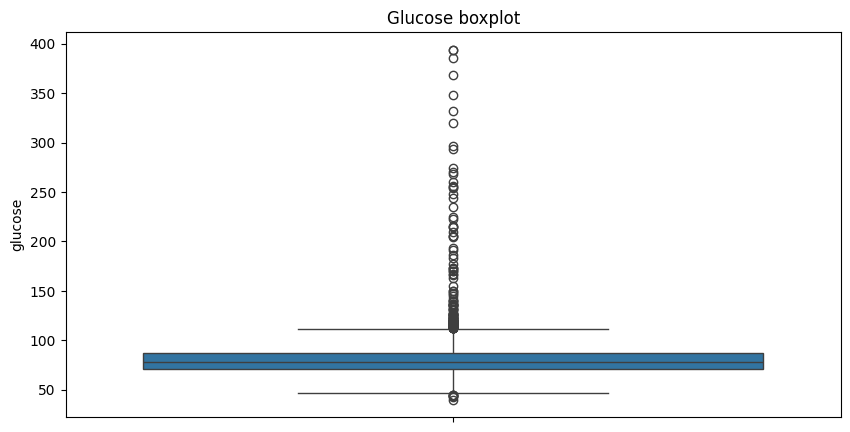

In [52]:
# Outliers in glucose
plt.figure(figsize=(10,5))          
sns.boxplot(df['glucose'])           
plt.title('Glucose boxplot')           

**la colonne "glucose" contient des valeurs aberrantes.**

In [53]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()           

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* La distribution est asymétrique positive, avec des valeurs aberrantes.
* Il y a **304**  valeurs manquantes dans la colonne glucose. **Si nous choisissons de les imputer avec une seule valeur de moyenne / médiane, nous introduirons un biais élevé à ce moment-là.**
* **Pour éviter cela, nous pouvons imputer les valeurs manquantes en utilisant l'imputation par les k plus proches voisins (KNN).**

In [54]:
from sklearn.impute import KNNImputer

# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)      

In [55]:
# mean, median, and mode for glucose after knn imputation
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.03504424778762,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

**Après l'imputation KNN, il n'y a pas de changement massif dans les valeurs moyennes. Et les valeurs de médiane et de mode restent les mêmes.**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  bmi                3390 non-null   float64
 11  heart_rate         3390 non-null   float64
 12  glucose            3390 non-null   float64
 13  ten_year_chd       3390 non-null   float64
 14  pulse_pressure     3390 non-null   float64
dtypes: float64(15)
memory usage: 397.4 KB


L'imputeur KNN a converti toutes les colonnes en type de données float64. Par conséquent, il faut changer le type de données des colonnes en fonction du type de données stockées dans chaque colonne respective.

In [57]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'bmi':float,'heart_rate':float,'glucose':float,
               'ten_year_chd':int})

In [58]:
# checking for missing values
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
pulse_pressure       0
dtype: int64

**Nous avons réussi à gérer toutes les valeurs manquantes dans l'ensemble de données.**

In [59]:
df.to_csv('clean_data.csv', index=False)